<a href="https://colab.research.google.com/github/SeymaNurAksoy/CurrencyConverterApp/blob/main/deepLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, GRU, Embedding, LSTM
from tensorflow.keras.optimizers import Adam # - Works
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from tensorflow.python.keras.models import load_model
import re
import nltk

nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
WPT = nltk.WordPunctTokenizer()
stop_word_list = nltk.corpus.stopwords.words('turkish')
stop_word_list

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['acaba',
 'ama',
 'aslında',
 'az',
 'bazı',
 'belki',
 'biri',
 'birkaç',
 'birşey',
 'biz',
 'bu',
 'çok',
 'çünkü',
 'da',
 'daha',
 'de',
 'defa',
 'diye',
 'eğer',
 'en',
 'gibi',
 'hem',
 'hep',
 'hepsi',
 'her',
 'hiç',
 'için',
 'ile',
 'ise',
 'kez',
 'ki',
 'kim',
 'mı',
 'mu',
 'mü',
 'nasıl',
 'ne',
 'neden',
 'nerde',
 'nerede',
 'nereye',
 'niçin',
 'niye',
 'o',
 'sanki',
 'şey',
 'siz',
 'şu',
 'tüm',
 've',
 'veya',
 'ya',
 'yani']

In [ ]:
dataset = pd.read_excel('sentiment_analysis.xlsx', sheet_name = 'Sheet1')
dataset

,Text,Sentiment
0,bana beklediğim cevapları vermiyorsun,0
1,senden istediğim cevaplar bunlar değil,0
2,verdiğin yanıtlar doğru değil,0
3,duymak istediğim cevaplar bunlar değil,0
4,seni seviyorum bro,1
...,...,...
19018,J7 Pro Cihazı Geldi Fakat Faturası Gelmedi!,0
19019,Müşteri Hizmetlerine Ulaşamama Sorunu!,0
19020,Para İadesi Sorunu!,0
19021,Mağdur Ediyor!,0


In [ ]:
dataset['Text'] = dataset['Text'].apply(lambda x: re.sub('[,\.!?:()"]', '', x))
dataset['Text'] = dataset['Text'].apply(lambda x: x.lower())
dataset['Text'] = dataset['Text'].apply(lambda x: x.strip())

def token(values):
    words = nltk.tokenize.word_tokenize(values)
    filtered_words = [word for word in words if word not in stop_word_list]
    not_stopword_doc = " ".join(filtered_words)
    return not_stopword_doc

dataset['Text'] = dataset['Text'].apply(lambda x: token(x))

In [ ]:
dataset['Text']

0             bana beklediğim cevapları vermiyorsun
1            senden istediğim cevaplar bunlar değil
2                     verdiğin yanıtlar doğru değil
3            duymak istediğim cevaplar bunlar değil
4                                seni seviyorum bro
                            ...                    
19018    j7 pro cihazı geldi fakat faturası gelmedi
19019         müşteri hizmetlerine ulaşamama sorunu
19020                           para i̇adesi sorunu
19021                                 mağdur ediyor
19022        ürünü aldığı halde parayı i̇ade etmedi
Name: Text, Length: 19023, dtype: object

In [ ]:
data = dataset['Text'].values.tolist()
sentiment = dataset['Sentiment'].values.tolist()

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data,sentiment,test_size = 0.2, random_state = 42)

In [ ]:
x_train[300]

'fiyata iyi süper'

In [ ]:
y_train[300]

1

In [ ]:
tokenizer = Tokenizer(num_words = 10000)
tokenizer.fit_on_texts(data)
tokenizer.word_index

{'bir': 1,
 'ürün': 2,
 'iyi': 3,
 'güzel': 4,
 'tavsiye': 5,
 'gayet': 6,
 'ederim': 7,
 'hızlı': 8,
 'aldım': 9,
 'yok': 10,
 'telefon': 11,
 'olarak': 12,
 'ürünü': 13,
 'göre': 14,
 'kadar': 15,
 '2': 16,
 'var': 17,
 'teşekkürler': 18,
 'elime': 19,
 'fiyat': 20,
 'uygun': 21,
 'kullanışlı': 22,
 'fiyata': 23,
 'ben': 24,
 'gün': 25,
 'değil': 26,
 'kargo': 27,
 'biraz': 28,
 '1': 29,
 'kaliteli': 30,
 'kullanıyorum': 31,
 'kalitesi': 32,
 'geldi': 33,
 'gerçekten': 34,
 'tek': 35,
 'şarj': 36,
 '3': 37,
 'sonra': 38,
 'bi': 39,
 'olması': 40,
 'cok': 41,
 'bence': 42,
 'küçük': 43,
 'kesinlikle': 44,
 'önce': 45,
 'tam': 46,
 'oldu': 47,
 'performans': 48,
 'ses': 49,
 'ulaştı': 50,
 'mükemmel': 51,
 'sorun': 52,
 'fakat': 53,
 'oldukça': 54,
 'fazla': 55,
 'ancak': 56,
 'bile': 57,
 'fiyatına': 58,
 'memnun': 59,
 'hepsiburada': 60,
 'başarılı': 61,
 'şık': 62,
 'fiyatı': 63,
 'uzun': 64,
 'telefonu': 65,
 'memnunum': 66,
 'hızı': 67,
 'ayrıca': 68,
 'sipariş': 69,
 'kolay': 70,

In [ ]:

x_train_tokens = tokenizer.texts_to_sequences(x_train)
x_test_tokens = tokenizer.texts_to_sequences(x_test)

In [ ]:
x_train_tokens[300]

[23, 3, 75]

In [ ]:
x_train[300]

'fiyata iyi süper'

In [ ]:

num_tokens = [len(tokens) for tokens in x_train_tokens + x_test_tokens]
num_tokens = np.array(num_tokens)

In [ ]:
np.mean(num_tokens)

16.39641486621458

In [ ]:
np.max(num_tokens)

233

In [ ]:

max_tokens = np.mean(num_tokens) + 2 * np.std(num_tokens)
max_tokens = int(max_tokens)
max_tokens

52

In [ ]:

np.sum(num_tokens < max_tokens) / len(num_tokens)

0.9601534983966777

In [ ]:

x_train_pad = np.array(pad_sequences(x_train_tokens, maxlen=max_tokens))
x_test_pad = np.array(pad_sequences(x_test_tokens, maxlen=max_tokens))


In [ ]:
np.array(x_train_pad[3027])

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,  542,   10, 1832,   15, 9904, 3943,  227, 1817,  195,
        112, 6744,  179,  689,  643,   55,   10, 2686], dtype=int32)

In [ ]:
x_test_pad[2000]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    2,   49,   32,   58,   14,   61,   45, 5251,
        529,  194,  183,  686, 3113,   56,    3,  123], dtype=int32)

In [ ]:

idx = tokenizer.word_index
inverse_map = dict(zip(idx.values(), idx.keys()))


def tokens_to_string(tokens):
    words = [inverse_map[token] for token in tokens if token!=0]
    text = ' '.join(words)
    return text

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
#ardışık bir model
model =Sequential()

embedding_size = 50


model.add(Embedding(input_dim=10000,
                    output_dim=embedding_size,
                    input_length=max_tokens,
                    name='embedding_layer'))

In [ ]:
!pip install tensorflow==2.2.0rc2
!pip install keras==2.2.4

In [ ]:

model.add(LSTM(units=16, return_sequences=True))

model.add(LSTM(units=8, return_sequences=True))

model.add(LSTM(units=4))

model.add(Dense(1, activation='sigmoid'))

In [ ]:


adam = keras.optimizers.Adam(learning_rate=0.0001)

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_layer (Embedding)  (None, 52, 50)            500000    
_________________________________________________________________
lstm_3 (LSTM)                (None, 52, 16)            4288      
_________________________________________________________________
lstm_4 (LSTM)                (None, 52, 8)             800       
_________________________________________________________________
lstm_5 (LSTM)                (None, 4)                 208       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 5         
Total params: 505,301
Trainable params: 505,301
Non-trainable params: 0
_________________________________________________________________


In [ ]:

x_train_pad=np.array(x_train_pad)
y_train =np.array(y_train)

history = model.fit(x_train_pad, y_train, epochs=5, batch_size=64,validation_split=0.25)

Epoch 1/5
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
179/179 [==============================] - ETA: 0s - loss: 0.4875 - accuracy: 0.7969WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x7f9ca4526e60> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the

In [ ]:
model.save("sentiment_model.h5")

In [ ]:

x_test_pad=np.array(x_test_pad)
y_test =np.array(y_test)
result = model.evaluate(x_test_pad, y_test)

119/119 [==============================] - 3s 22ms/step - loss: 0.2555 - accuracy: 0.9206


In [ ]:
result[1]

0.9206307530403137

In [ ]:
y_pred = model.predict_classes(x=x_test_pad[:700])


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:454: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [ ]:
y_pred = y_pred.T[0]

In [ ]:
y_pred

array([1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
text = "katılıyorum"
texts = [text]
tokens = tokenizer.texts_to_sequences(texts)

In [ ]:
tokens_pad = pad_sequences(tokens,maxlen = max_tokens)
tokens_pad.shape

(1, 52)

In [ ]:
print("moralinizin {} olduğunu görüyorum. ".format(model.predict_classes(tokens_pad).tolist()[0][0]))


moralinizin 0 olduğunu görüyorum. 


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:454: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


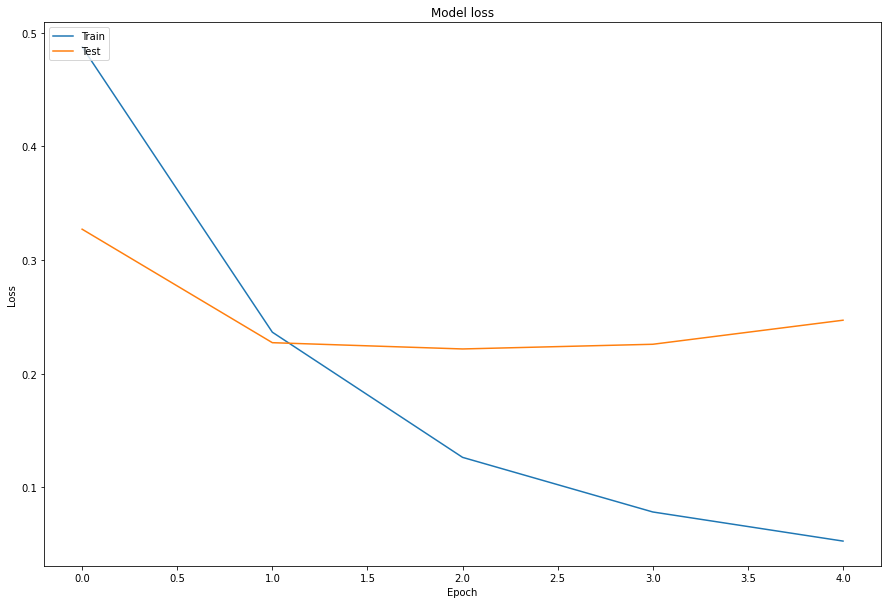

In [ ]:
plt.figure(figsize = (15,10))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

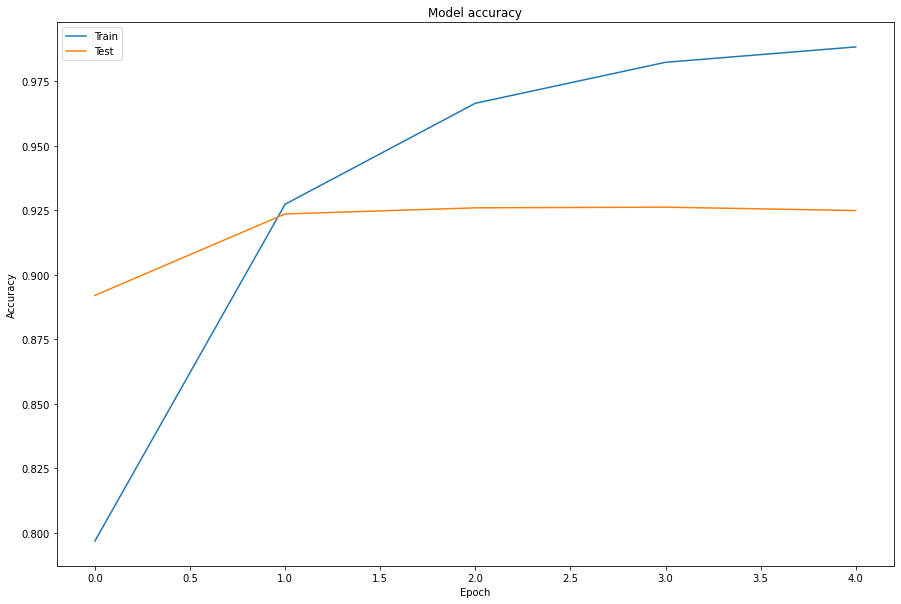

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize = (15,10))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Yeni Bölüm